### Data Modeling and Evaluation

In [13]:
# Required package.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold

%matplotlib inline

RANDOM_STATE = 19730115

In [14]:
def read_pickle(path):
    """Read a pickle file.
    """
    return pd.read_pickle(path)

In [15]:
def split_data(data):
    # Get the features and target variable.
    X, y = data.iloc[:, 1:-1].values, data.iloc[:, -1].values

    # Split the dataframe in training and testing chuncks.
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=RANDOM_STATE)

    return X_train, X_test, y_train, y_test


def train_model(X_train, y_train, estimator=None, distributions=None):
    """Split the dataframe in training and testing partitions.
    """
    
    kfold = RepeatedKFold(n_splits=5, n_repeats=2, random_state=RANDOM_STATE)

    search = RandomizedSearchCV(
        estimator=estimator,
        param_distributions=distributions,
        scoring='f1',
        refit=True,
        verbose=0,
        random_state=RANDOM_STATE
    )

    model = search.fit(X_train, y_train)
    return model.best_estimator_, model.cv_results_['mean_test_score']


def test_model(model, X_test, y_test):
    """Test model.
    """
    y_pred = model.predict(X_test)
    return f1_score(y_pred, y_test)


In [16]:
reviews_cv = read_pickle('../data/processed/buscape_counter_vectorized.pkl')
reviews_tv = read_pickle('../data/processed/buscape_tfidf_vectorized.pkl')  
reviews_gv = read_pickle('../data/processed/buscape_glove_s50_vectorized.pkl')

In [17]:
train_scores=[]
baseline_estimator = KNeighborsClassifier()
baseline_estimator_distributions = {
        'n_neighbors': list(range(1, 31, 2)), 
        'weights': ['uniform', 'distance']
}

X_train_cv, X_test_cv, y_train_cv, y_test_cv = split_data(reviews_cv)

model, scores = train_model(X_train_cv, y_train_cv, baseline_estimator, baseline_estimator_distributions)
train_scores.append(list(scores))

print(test_model(model, X_test_cv, y_test_cv))

0.8514619883040937


In [18]:
X_train_tv, X_test_tv, y_train_tv, y_test_tv = split_data(reviews_tv)

model, scores = train_model(X_train_tv, y_train_tv, baseline_estimator, baseline_estimator_distributions)
train_scores.append(list(scores))

print(test_model(model, X_test_tv, y_test_tv))

0.8468677494199537


In [19]:
X_train_gv, X_test_gv, y_train_gv, y_test_gv = split_data(reviews_gv)
model, scores = train_model(X_train_gv, y_train_gv, baseline_estimator, baseline_estimator_distributions)
train_scores.append(list(scores))

print(test_model(model, X_test_gv, y_test_gv))

0.8471001757469243


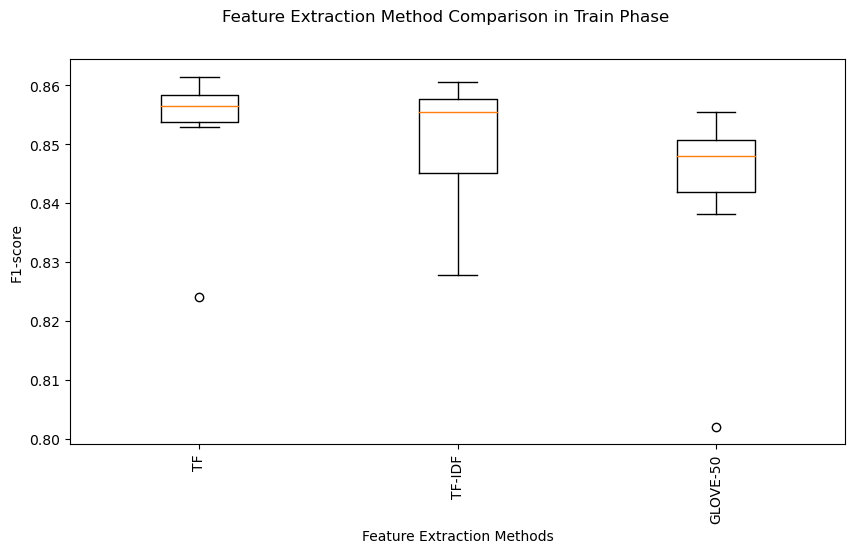

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(rotation=90)
fig.suptitle('Feature Extraction Method Comparison in Train Phase')
_ = plt.boxplot(train_scores)
ax.set_xticklabels(['TF', 'TF-IDF', 'GLOVE-50'])
ax.set_ylabel('F1-score')
ax.set_xlabel('Feature Extraction Methods')
plt.show()